# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
resource_url = "https://ycharts.com/companies/TSLA/revenues"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
request = requests.get(resource_url, headers = headers)
html_data = request.text

In [3]:
soup = BeautifulSoup(html_data,"html.parser")
soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [4]:
output = soup.find_all("table")
output[0]

<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>June 30, 2024</td>
<td class="text-right">
                            
                                25.50B
                            
                        </td>
</tr>
<tr>
<td>March 31, 2024</td>
<td class="text-right">
                            
                                21.30B
                            
                        </td>
</tr>
<tr>
<td>December 31, 2023</td>
<td class="text-right">
                            
                                25.17B
                            
                        </td>
</tr>
<tr>
<td>September 30, 2023</td>
<td class="text-right">
                            
                                23.35B
                            
                        </td>
</tr>
<tr>
<td>June 30, 2023</td>
<td class="text-right">
                            
                                24.93B
                        

In [5]:
temp = []
for i in range(2):
    for row in output[i].tbody.find_all("tr"):
            date = row.find_all("td")[0].text
            revenue = row.find_all("td")[1].text.strip() 
            temp.append([date,revenue])

In [6]:
df = pd.DataFrame(temp,columns=["Date", "Revenue"])
df

,Date,Revenue
0,"June 30, 2024",25.50B
1,"March 31, 2024",21.30B
2,"December 31, 2023",25.17B
3,"September 30, 2023",23.35B
4,"June 30, 2023",24.93B
5,"March 31, 2023",23.33B
6,"December 31, 2022",24.32B
7,"September 30, 2022",21.45B
8,"June 30, 2022",16.93B
9,"March 31, 2022",18.76B


In [7]:
def to_million(num):
    if num.endswith("B"):
        num = float(num.rstrip("B")) * 1000
    elif num.endswith("M"):
        num = float(num.rstrip("M"))
    return num

In [8]:
df.Revenue = df.Revenue.apply(to_million)
df

,Date,Revenue
0,"June 30, 2024",25500.00
1,"March 31, 2024",21300.00
2,"December 31, 2023",25170.00
3,"September 30, 2023",23350.00
4,"June 30, 2023",24930.00
5,"March 31, 2023",23330.00
6,"December 31, 2022",24320.00
7,"September 30, 2022",21450.00
8,"June 30, 2022",16930.00
9,"March 31, 2022",18760.00


In [13]:
df = df[df["Revenue"] != ""]
df.head()

,Date,Revenue
0,"June 30, 2024",25500.0
1,"March 31, 2024",21300.0
2,"December 31, 2023",25170.0
3,"September 30, 2023",23350.0
4,"June 30, 2023",24930.0


In [17]:
comm = sqlite3.connect("Revenue.db")
comm.execute("""DROP TABLE Revenue;""")
# comm.execute("""CREATE TABLE if not exists Revenue (Date, Revenue);""")

In [18]:
cursor = comm.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [14]:
tesla_tuples = list(df.to_records(index = False))
tesla_tuples[:5]

[('June 30, 2024', 25500.),
 ('March 31, 2024', 21300.),
 ('December 31, 2023', 25170.),
 ('September 30, 2023', 23350.),
 ('June 30, 2023', 24930.)]

In [22]:
# for index, row in df.iterrows():
#     date = row["Date"]
#     revenue = row["Revenue"]

#     print(date)  # Access data using column names
#     print(revenue)
# tesla_tuples = list(df.to_records(index = False))
# print(tesla_tuples[:5])

cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
comm.commit()

In [23]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('June 30, 2024', 25500.0)
('March 31, 2024', 21300.0)
('December 31, 2023', 25170.0)
('September 30, 2023', 23350.0)
('June 30, 2023', 24930.0)
('March 31, 2023', 23330.0)
('December 31, 2022', 24320.0)
('September 30, 2022', 21450.0)
('June 30, 2022', 16930.0)
('March 31, 2022', 18760.0)
('December 31, 2021', 17720.0)
('September 30, 2021', 13760.0)
('June 30, 2021', 11960.0)
('March 31, 2021', 10390.0)
('December 31, 2020', 10740.0)
('September 30, 2020', 8771.0)
('June 30, 2020', 6036.0)
('March 31, 2020', 5985.0)
('December 31, 2019', 7384.0)
('September 30, 2019', 6303.0)
('June 30, 2019', 6350.0)
('March 31, 2019', 4541.0)
('December 31, 2018', 7226.0)
('September 30, 2018', 6824.0)
('June 30, 2018', 4002.0)
('March 31, 2018', 3409.0)
('December 31, 2017', 3288.0)
('September 30, 2017', 2985.0)
('June 30, 2017', 2790.0)
('March 31, 2017', 2696.0)
('December 31, 2016', 2285.0)
('September 30, 2016', 2298.0)
('June 30, 2016', 1270.0)
('March 31, 2016', 1147.0)
('December 31, 2015'

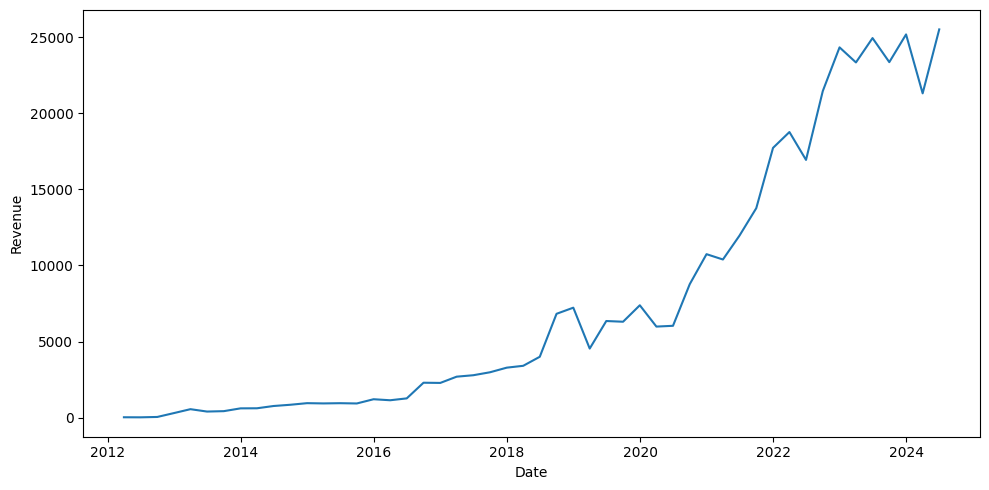

In [24]:
fig, axis = plt.subplots(figsize = (10, 5))

df["Date"] = pd.to_datetime(df["Date"])
df["Revenue"] = df["Revenue"].astype('int')
sns.lineplot(data = df, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

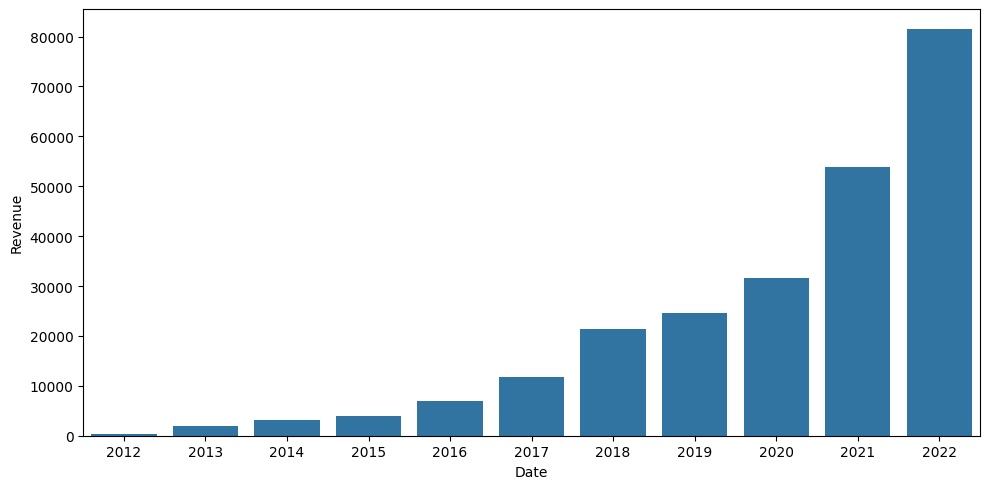

In [25]:
fig, axis = plt.subplots(figsize = (10, 5))

df["Date"] = pd.to_datetime(df["Date"])
df_yearly = df.groupby(df["Date"].dt.year).sum().reset_index()

sns.barplot(data = df_yearly[df_yearly["Date"] < 2023], x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

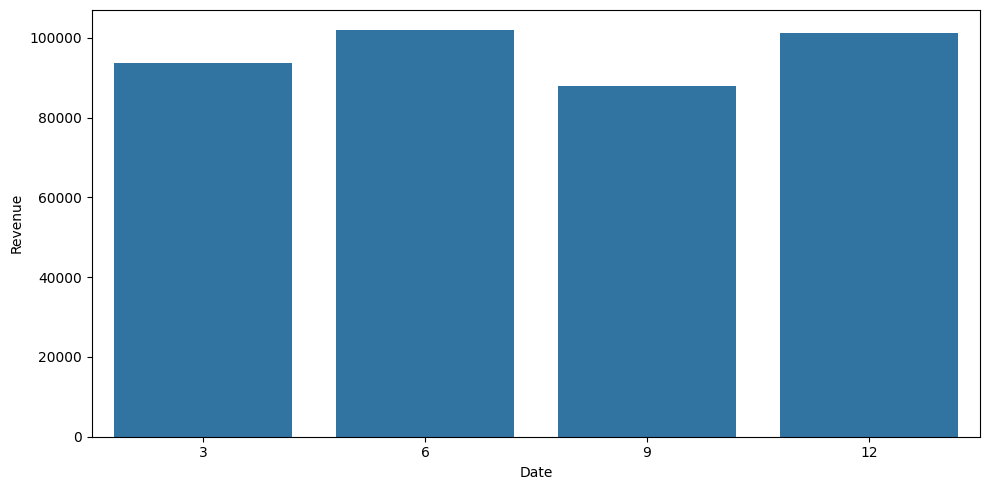

In [26]:
fig, axis = plt.subplots(figsize = (10, 5))

df_monthly = df.groupby(df["Date"].dt.month).sum().reset_index()

sns.barplot(data = df_monthly, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()